# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Data Preprocessing Part 1

In [3]:
# Remove unused columns
df.drop(columns=['policy_number', 'incident_location',
                 'auto_model', '_c39', 'policy_bind_date',
                 'incident_date', 'insured_zip', 'insured_hobbies',
                 'auto_make', 'auto_year', 'policy_annual_premium',
                 'umbrella_limit'], inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,250/500,1000,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,IN,250/500,2000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,OH,100/300,2000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,IL,250/500,2000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,IL,500/1000,1000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [4]:
# Check the number of unique column for each Object Datatype column
object_columns = df.select_dtypes(include=['object']).columns
unique_counts = df[object_columns].nunique()

print("Unique value counts for object datatype columns:")
print(unique_counts)

Unique value counts for object datatype columns:
policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_relationship        6
incident_type               4
collision_type              4
incident_severity           4
authorities_contacted       4
incident_state              7
incident_city               7
property_damage             3
police_report_available     3
fraud_reported              2
dtype: int64


# Check the percentage of null value

In [5]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
months_as_customer             0.0
age                            0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          9.1
incident_state                 0.0
incident_city                  0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries                0.0
witnesses                      0.0
police_report_available        0.0
total_claim_amount             0.0
injury_claim                   0.0
property_claim                 0.0
vehicle_claim                  0.0
fraud_reporte

In [6]:
# Fill Null value on authorities_contacted with 'Others'
df['authorities_contacted'].fillna('Other', inplace=True)

# Replace all of the "?" with "Unknown"

In [7]:
df.replace("?", "Unknown", inplace=True)

In [8]:
# Calculate the percentage of "Unknown" values in each column
unknown_percentage = (df == "Unknown").sum() / len(df) * 100

# Filter columns with "Unknown" values
unknown_columns = unknown_percentage[unknown_percentage > 0]

# Print the percentage of "Unknown" values in each column
print("Percentage of Unknown values in each column:")
print(unknown_percentage[unknown_columns.index])

Percentage of Unknown values in each column:
collision_type             17.8
property_damage            36.0
police_report_available    34.3
dtype: float64


In [9]:
# Drop property_damage and police_report_available
df.drop(columns=['property_damage', 'police_report_available'], inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,250/500,1000,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,1,2,71610,6510,13020,52080,Y
1,228,42,IN,250/500,2000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,0,0,5070,780,780,3510,Y
2,134,29,OH,100/300,2000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,2,3,34650,7700,3850,23100,N
3,256,41,IL,250/500,2000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,1,2,63400,6340,6340,50720,Y
4,228,44,IL,500/1000,1000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,Other,NY,Arlington,20,1,0,1,6500,1300,650,4550,N


# Exploratory Data Analysis

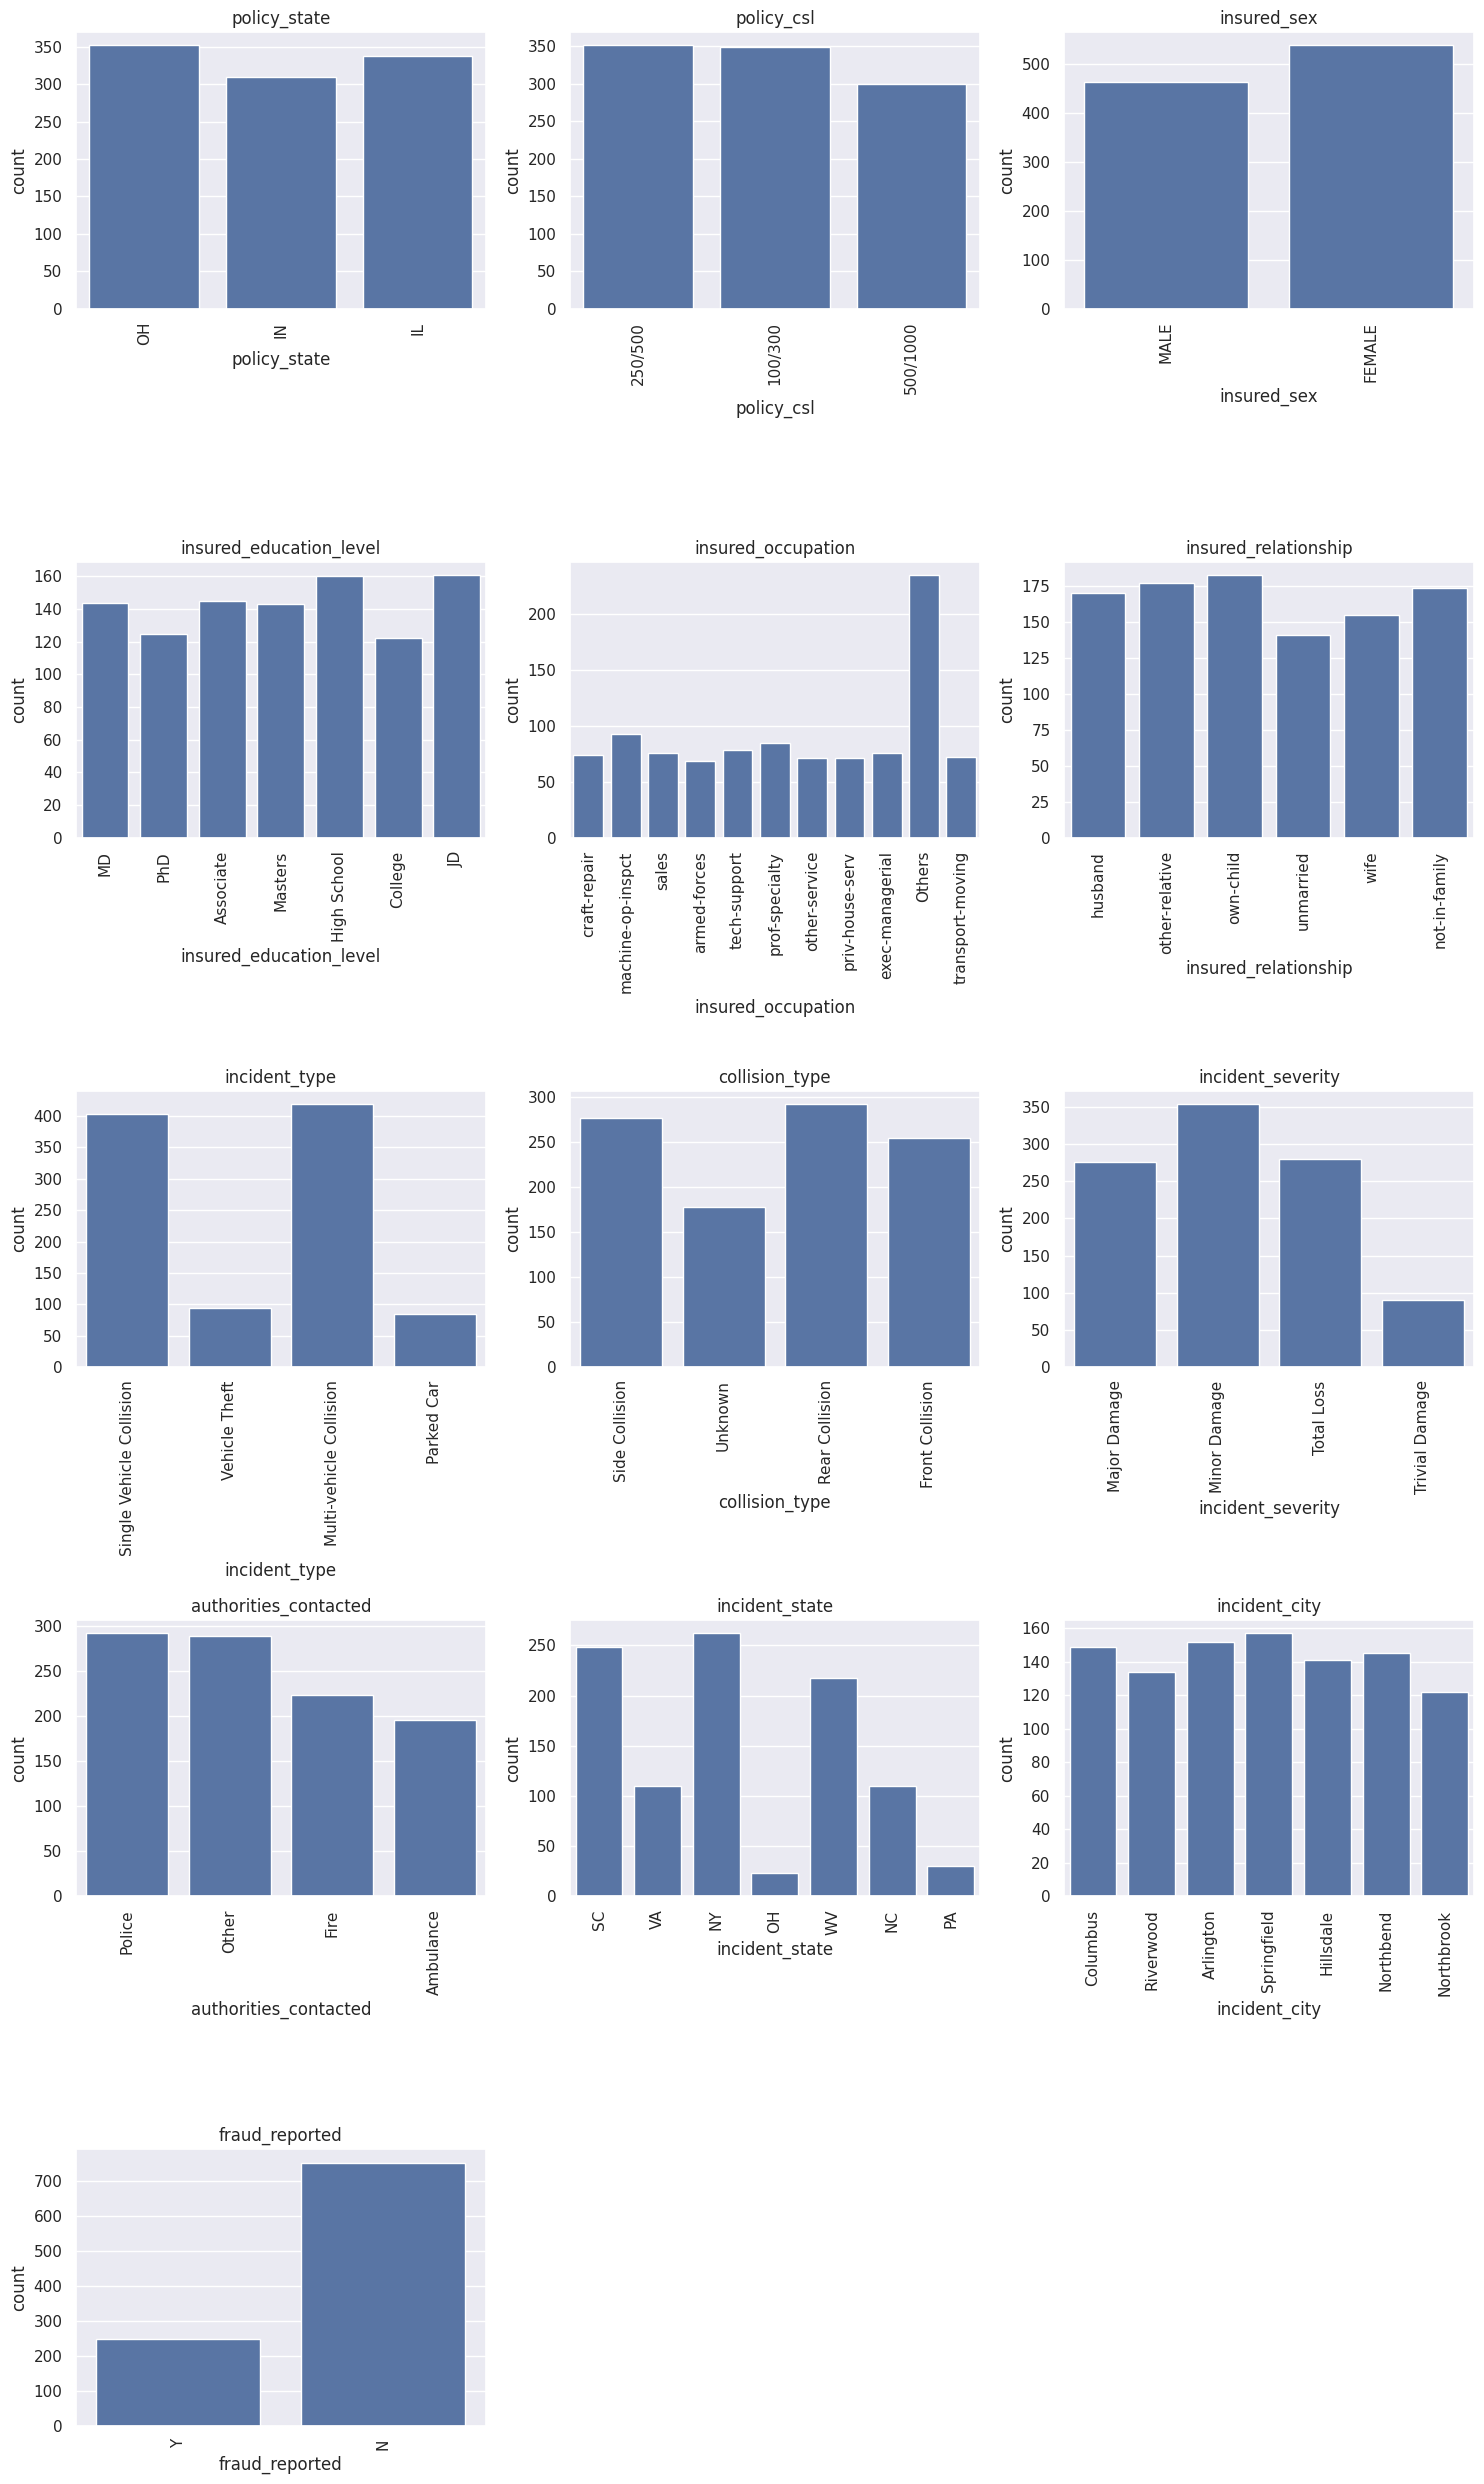

In [10]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 10 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(10).index
    filtered_df = df.copy()
    filtered_df[var] = df[var].apply(lambda x: x if x in top_values else 'Others')
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

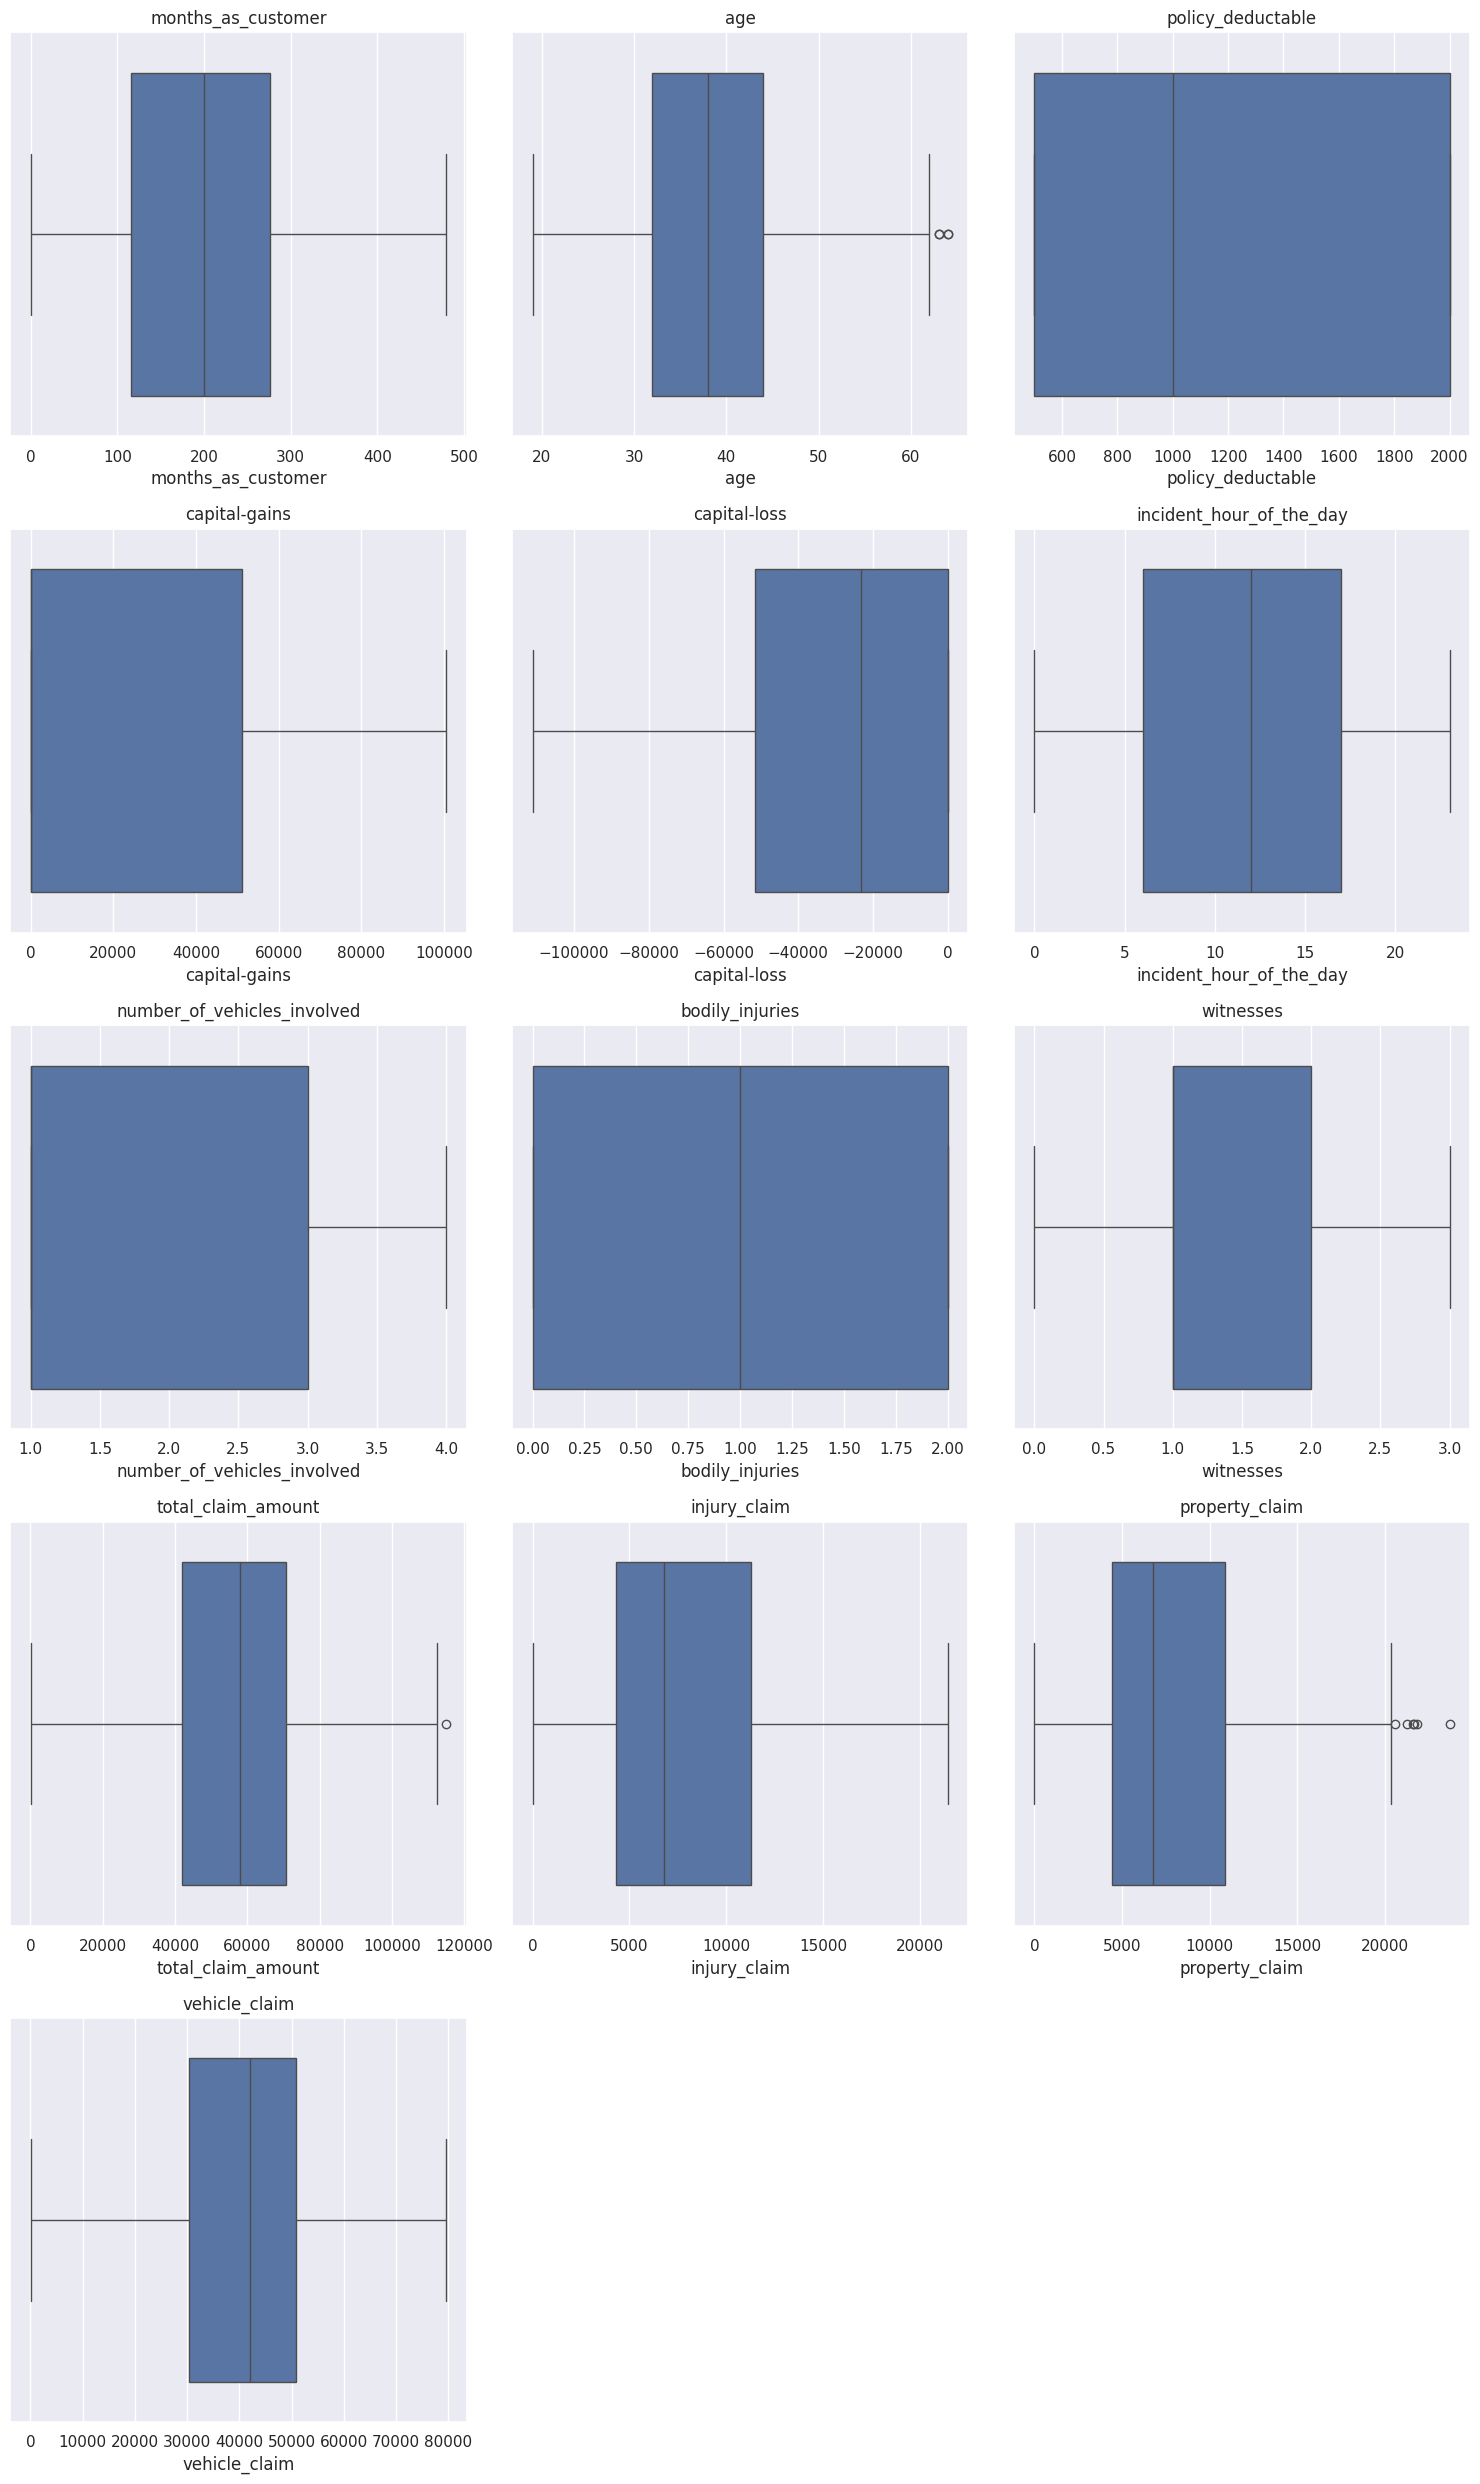

In [11]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

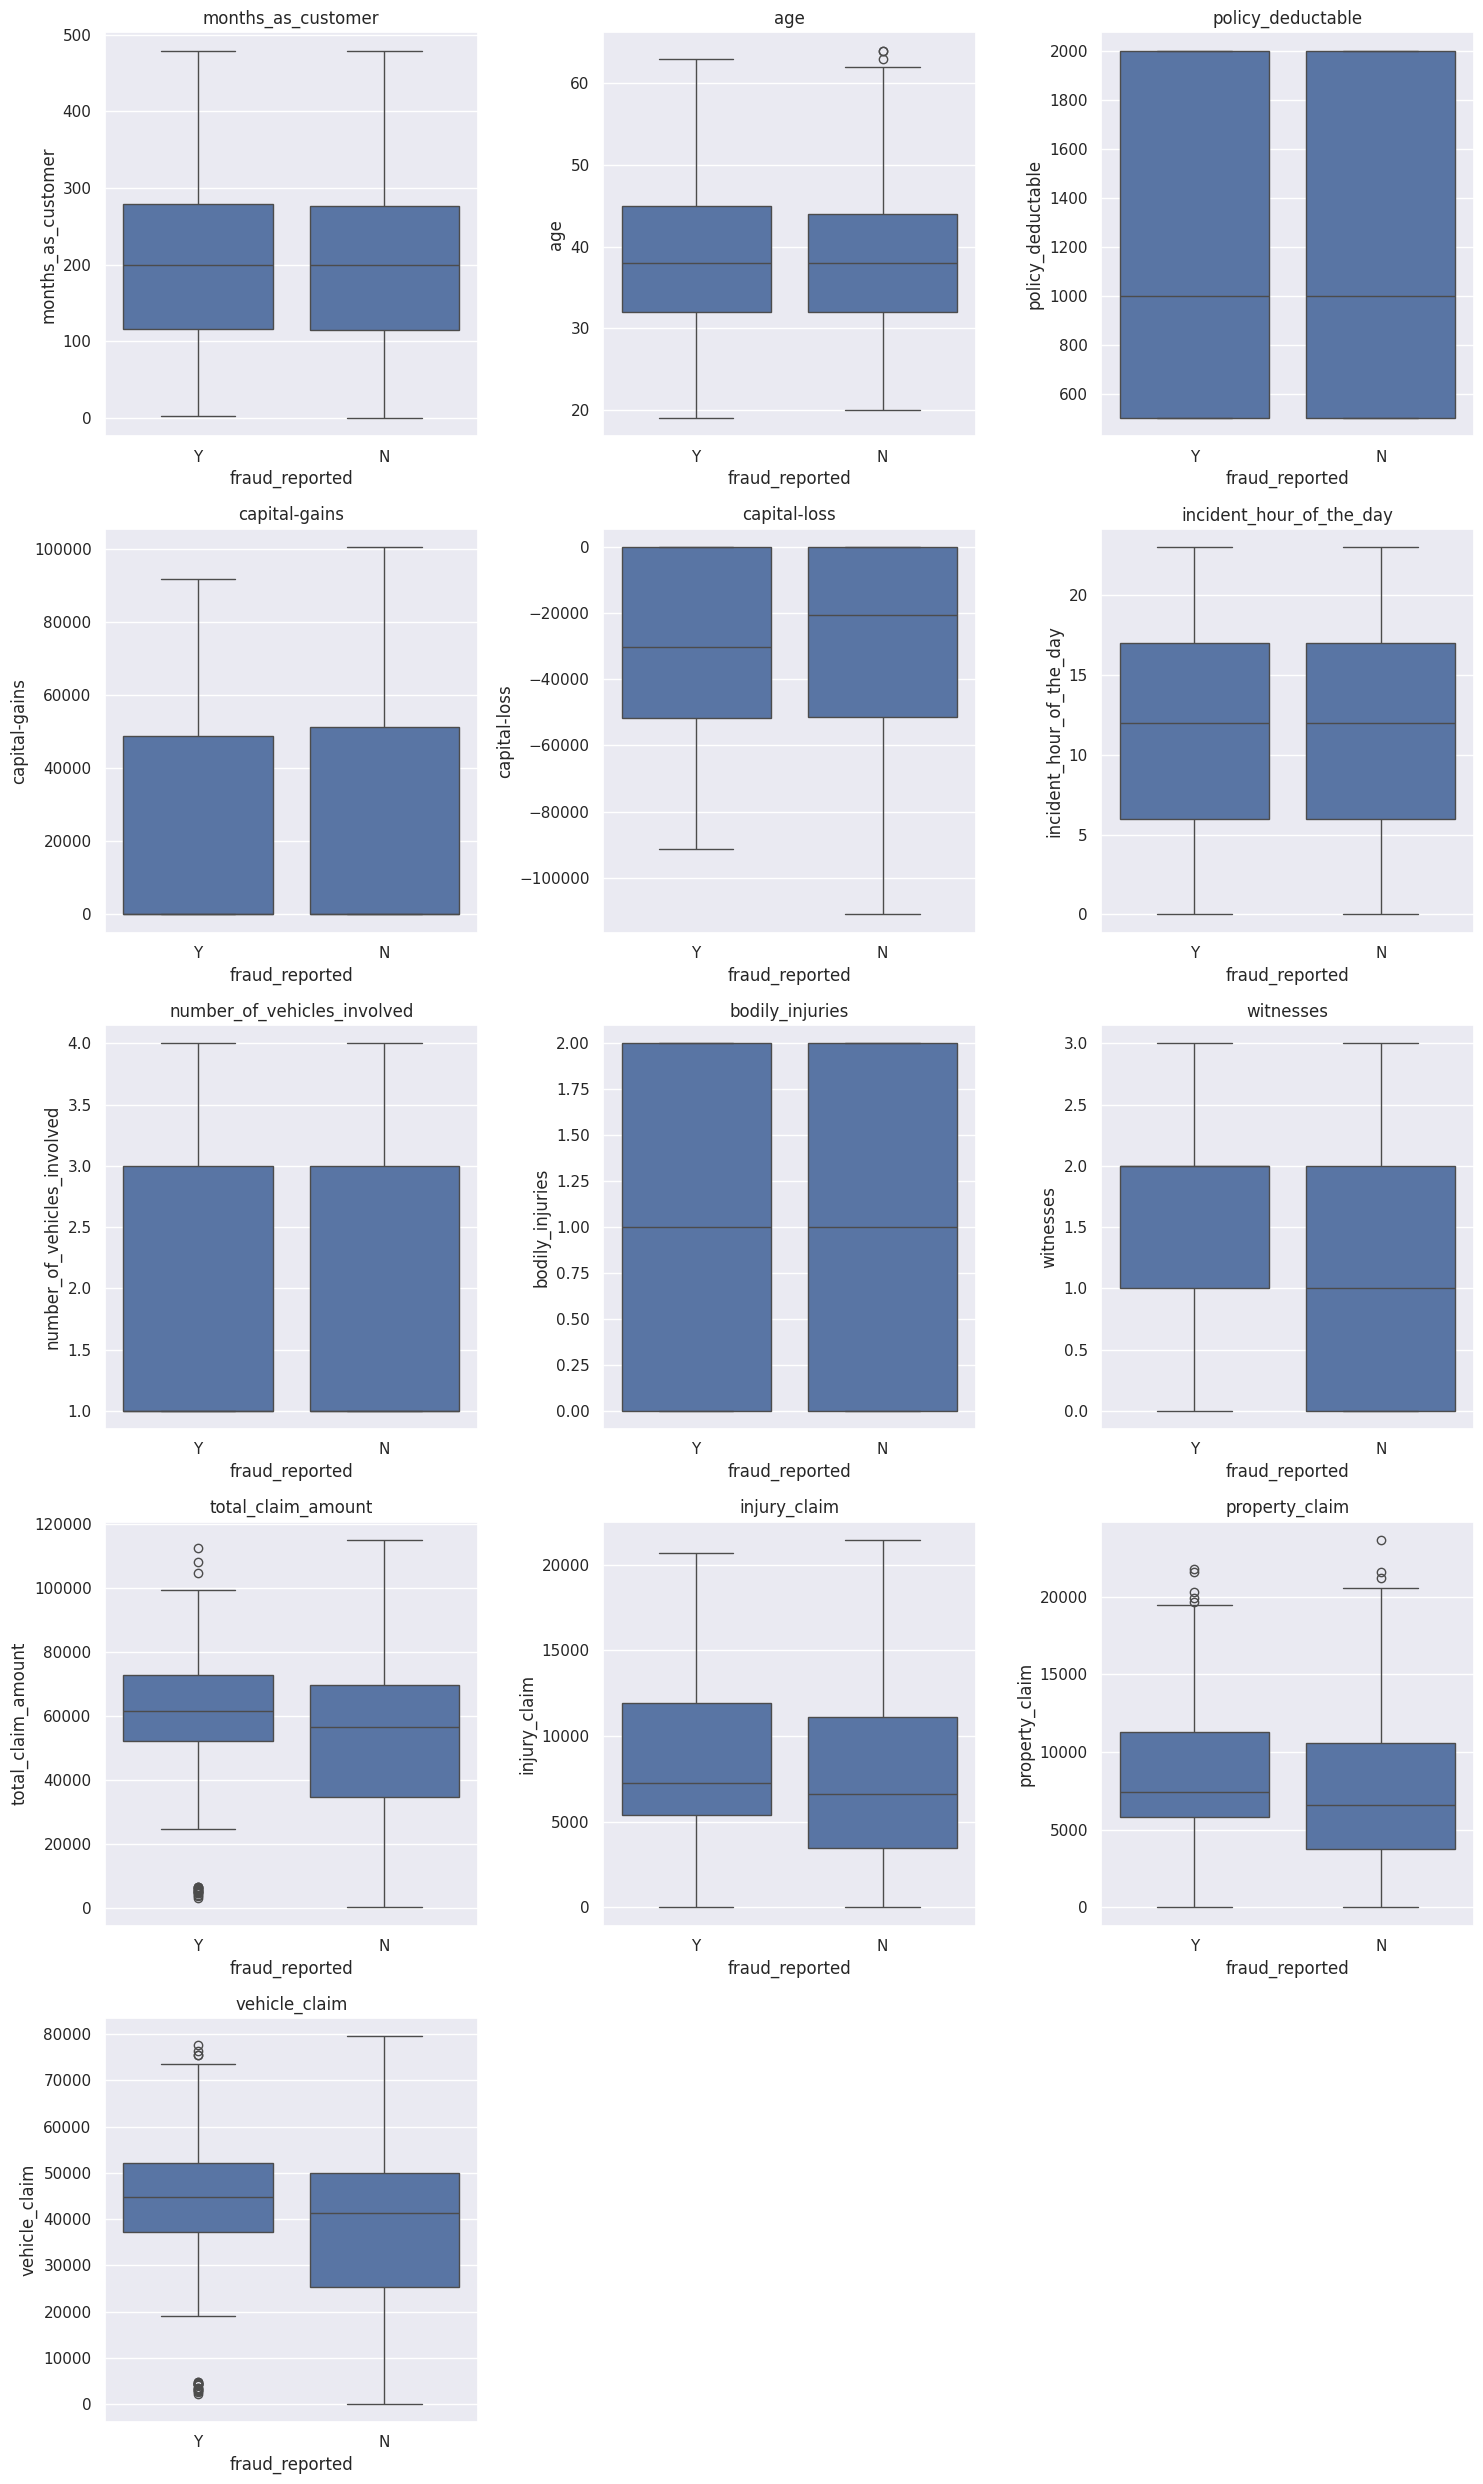

In [12]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='fraud_reported'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='fraud_reported', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

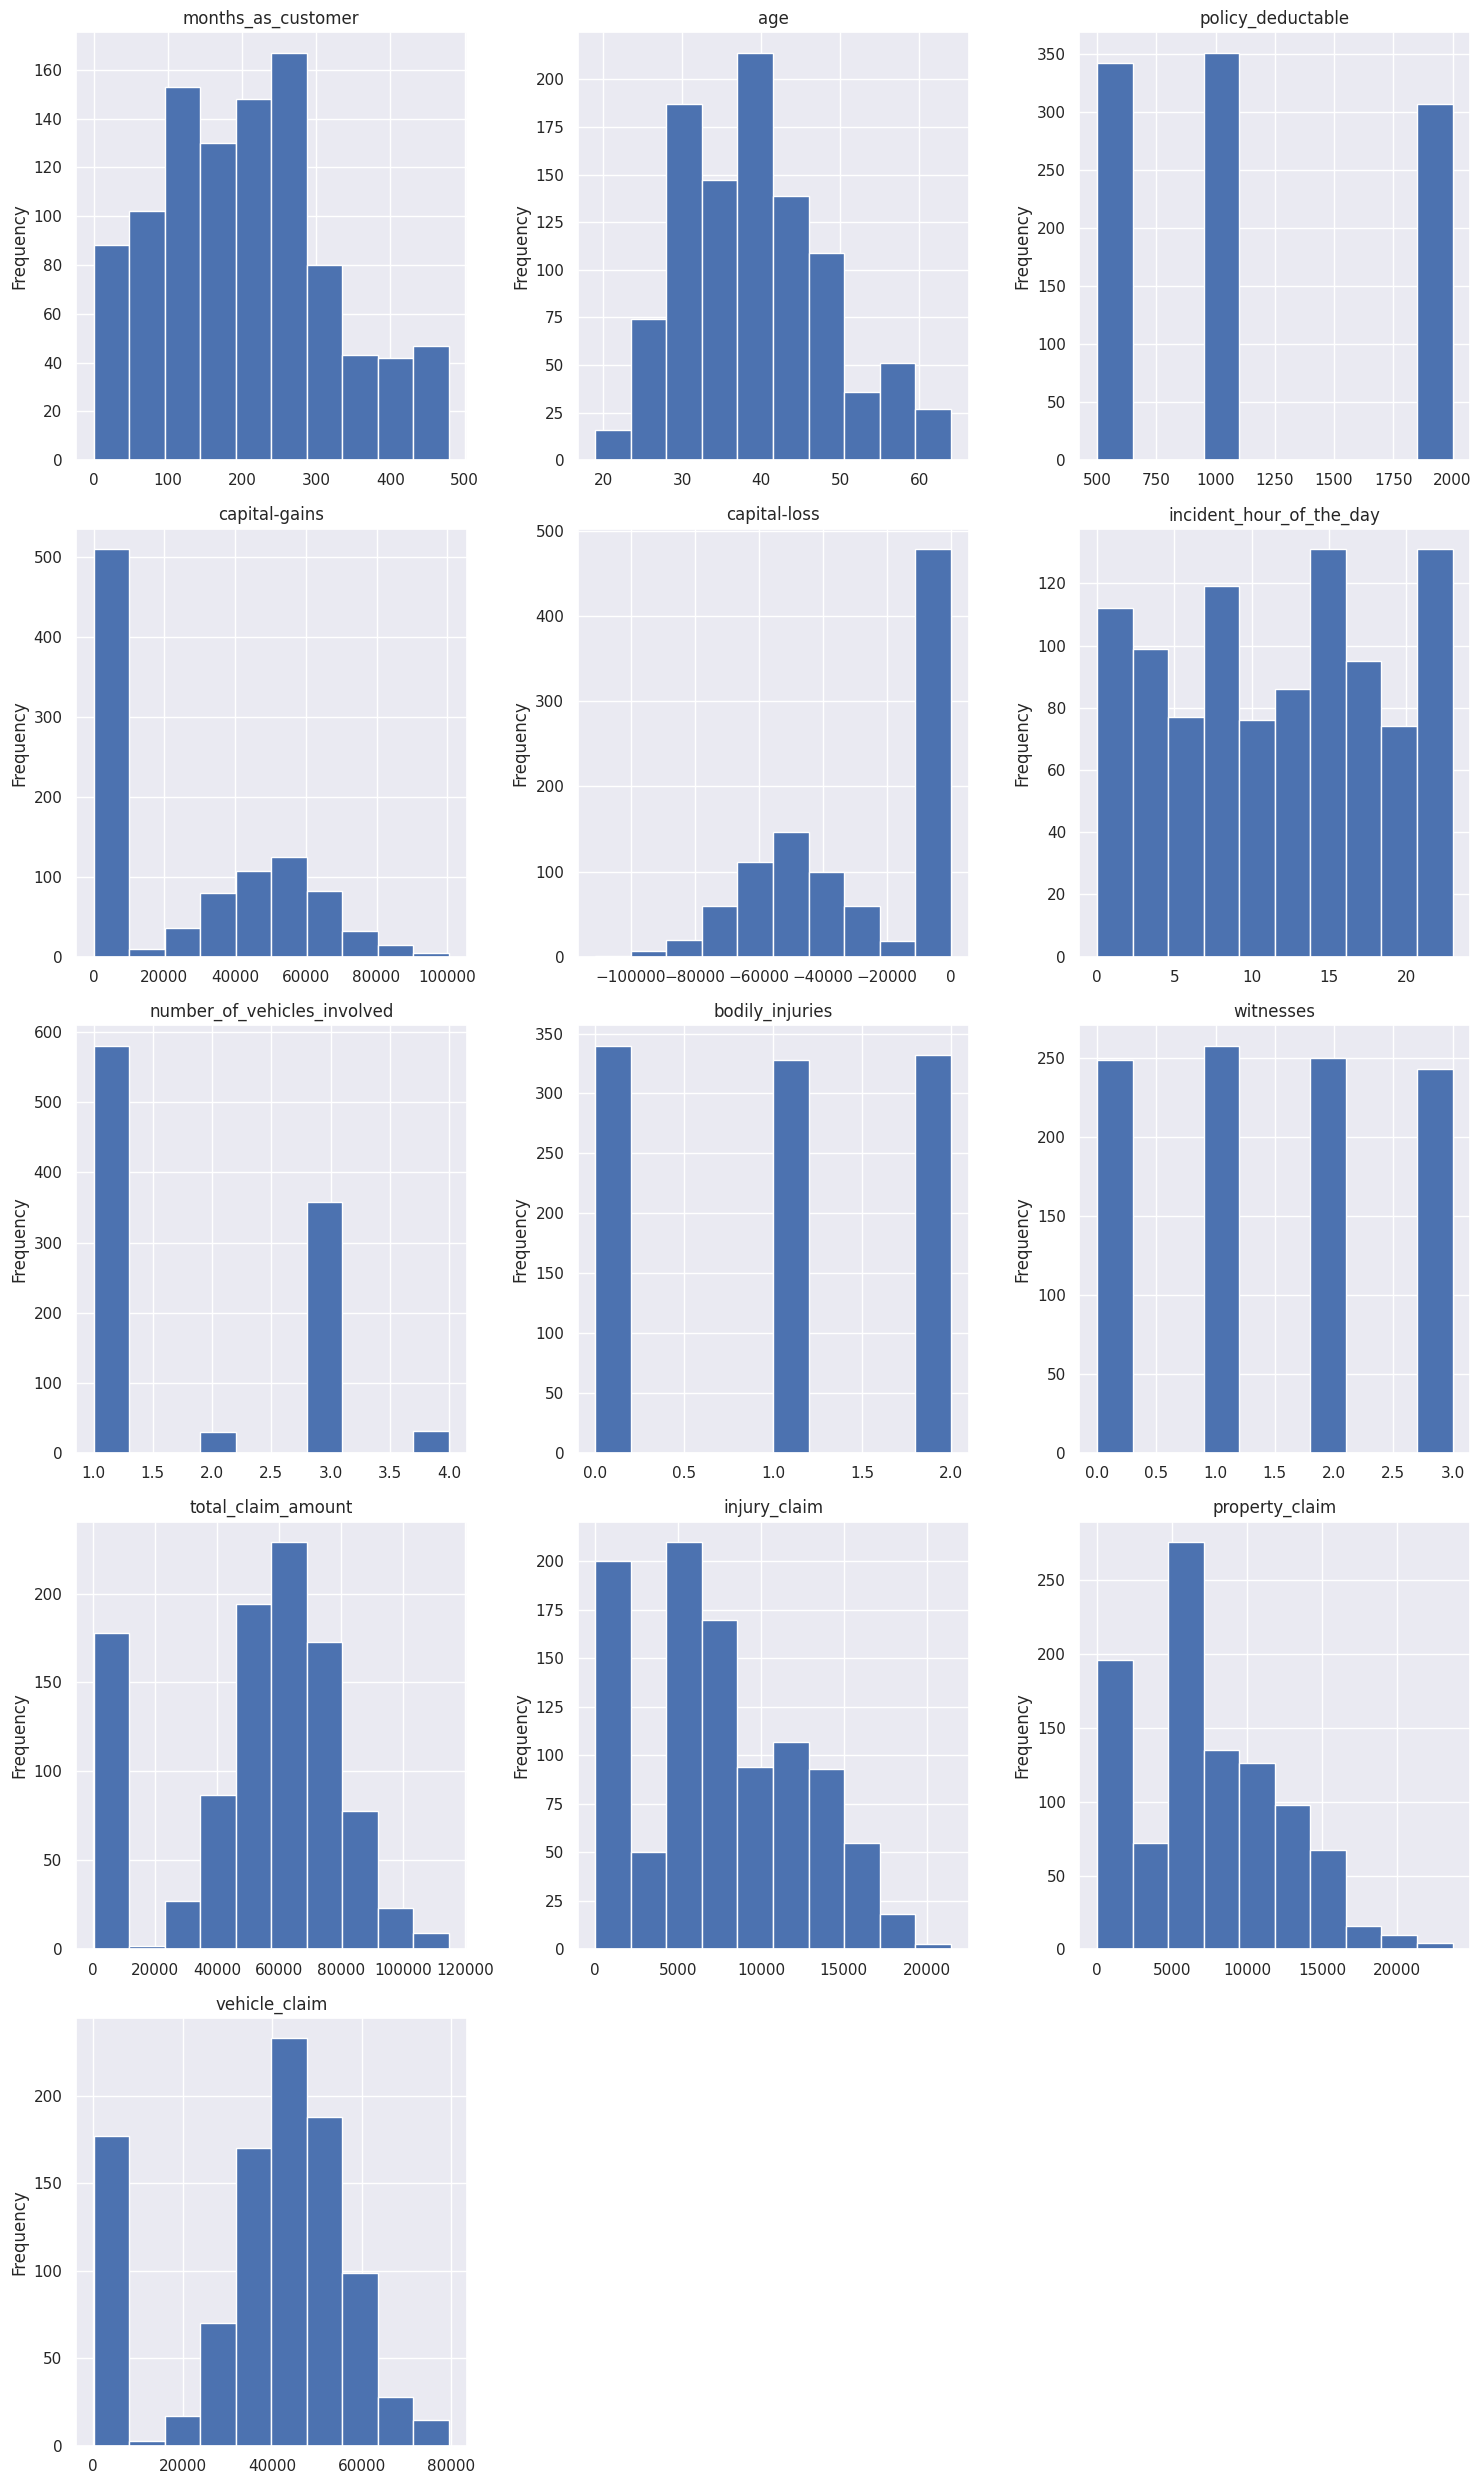

In [13]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

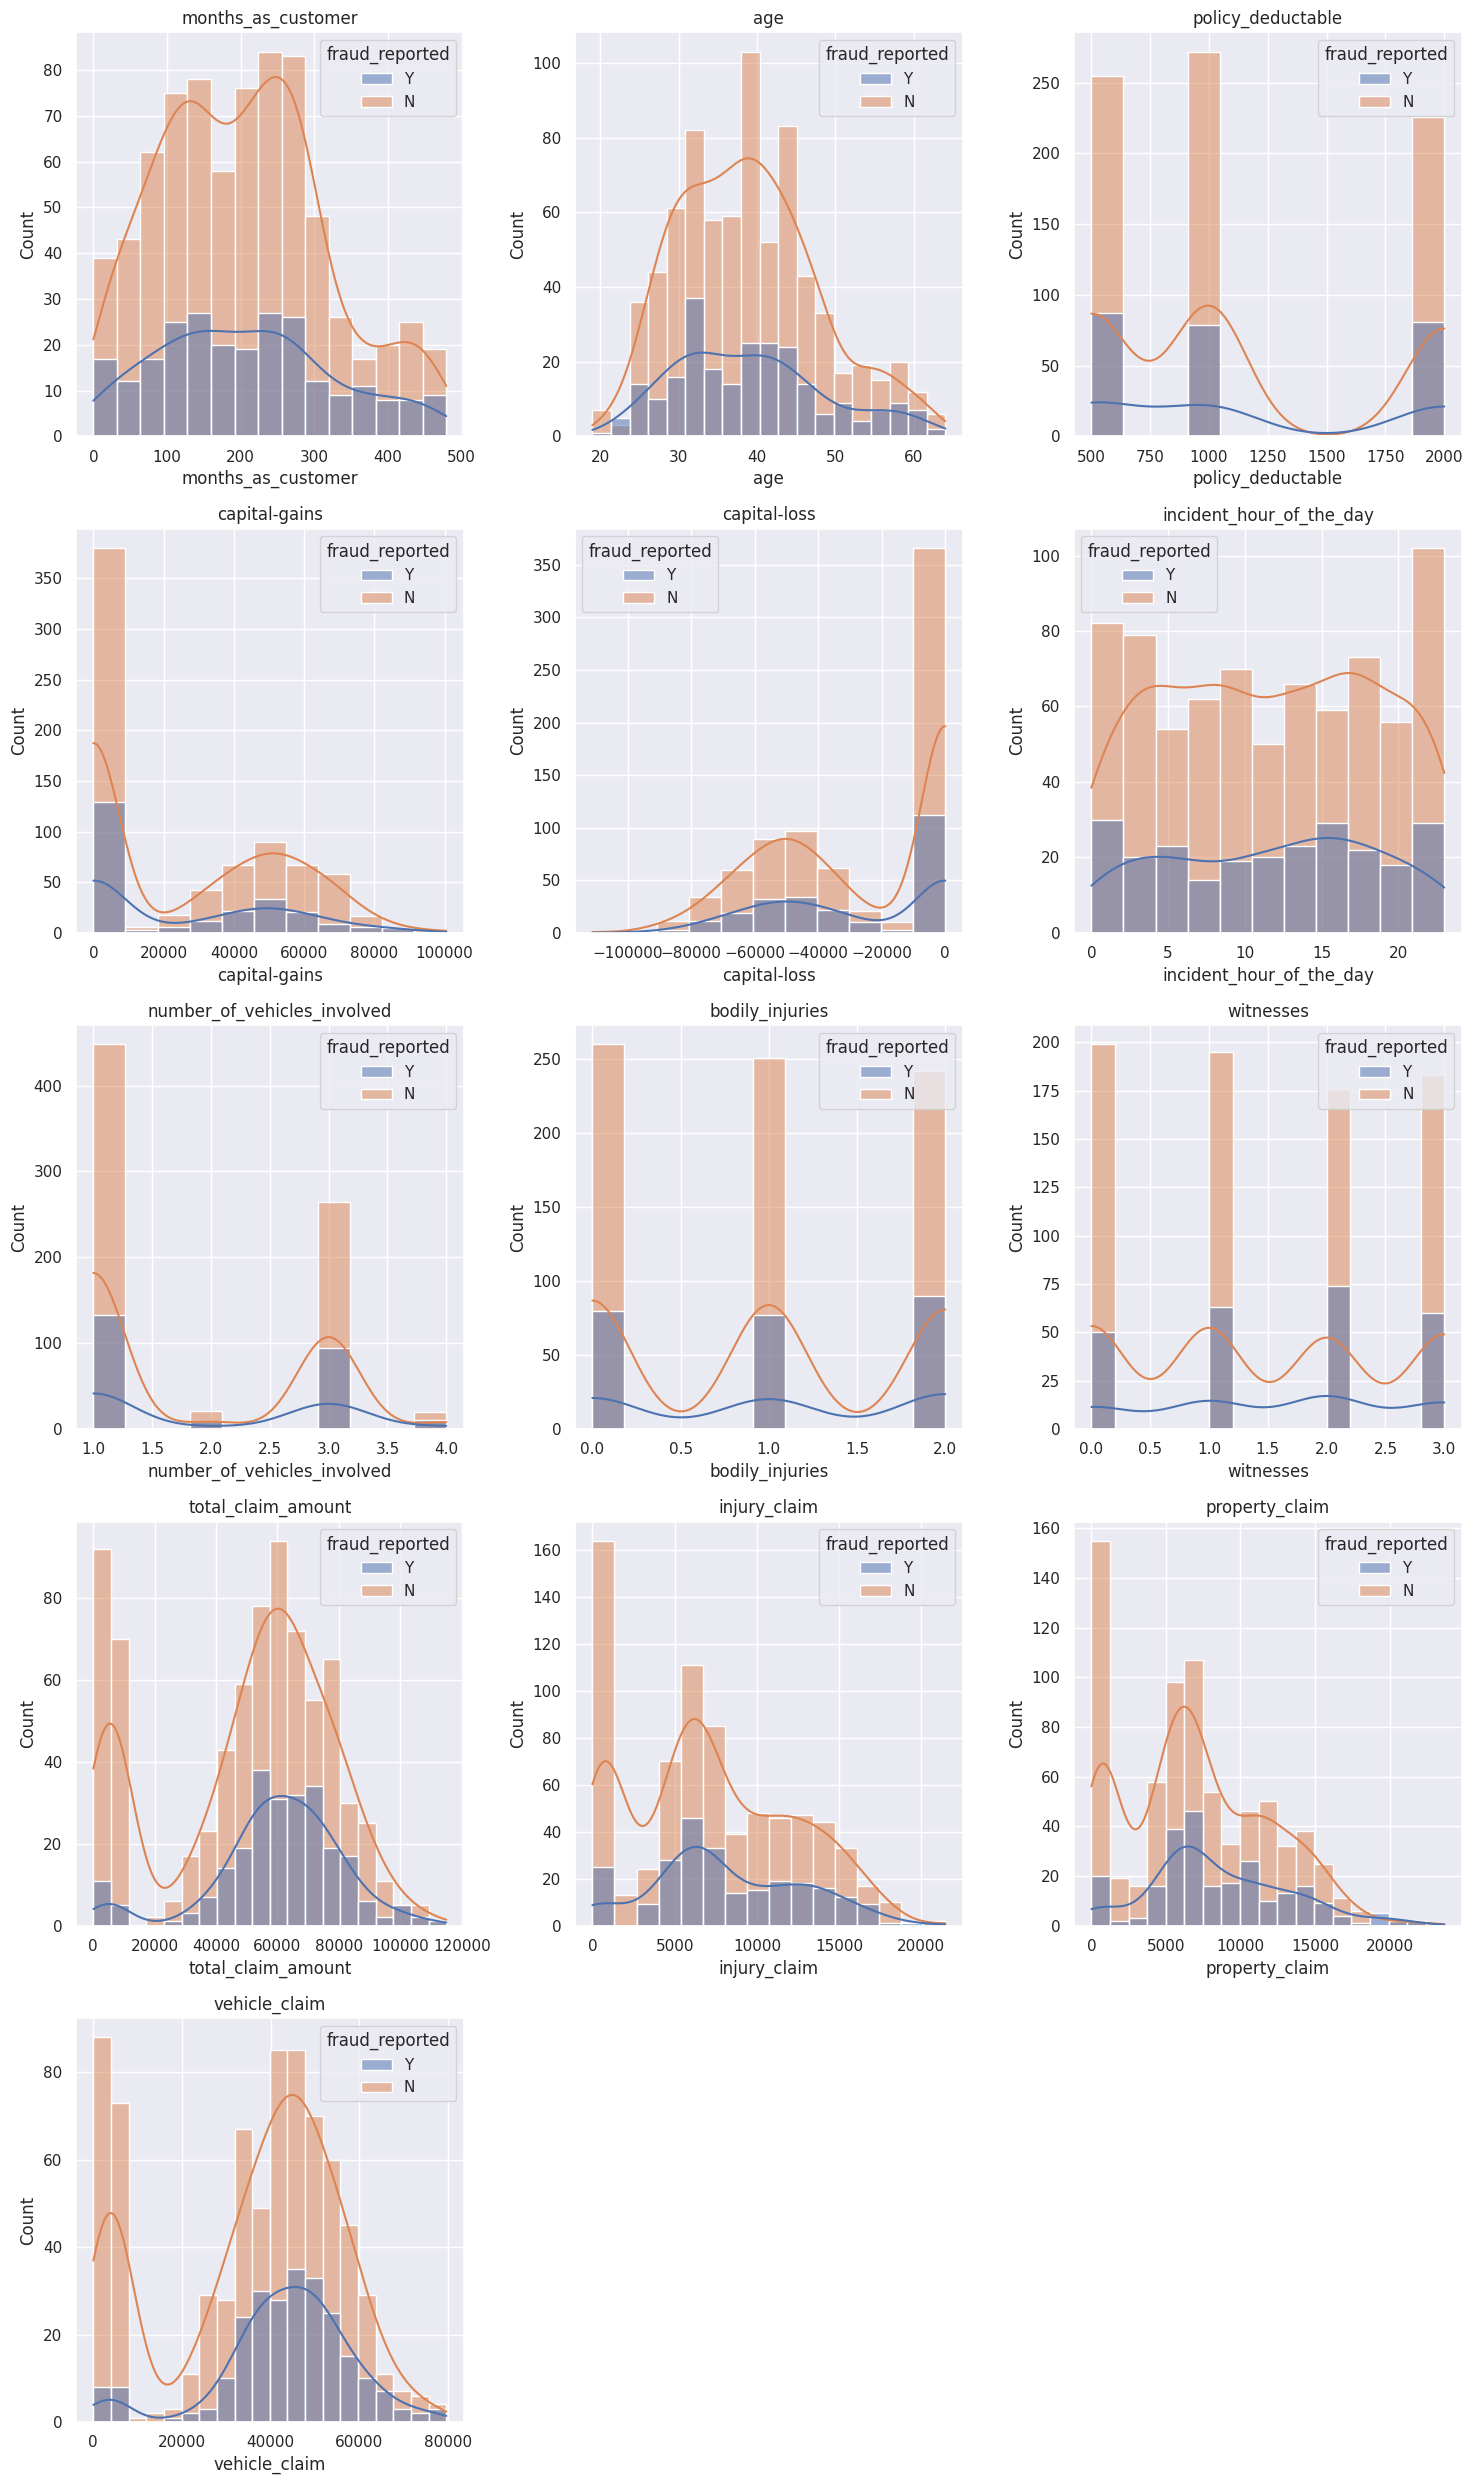

In [14]:
# Get the names of all columns with data type 'int' or 'float' excluding 'EmployeeCount'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Calculate the number of rows and columns for subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # 3 subplots per row, rounding up

# Create a figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='fraud_reported'
for i, var in enumerate(int_vars):
    if i < num_cols:  # To avoid accessing non-existent subplots
        sns.histplot(data=df, x=var, hue='fraud_reported', kde=True, ax=axs[i])
        axs[i].set_title(var)

# Adjust spacing between subplots
fig.tight_layout()

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Show plot
plt.show()

<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-15-237b3c244c3b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipy

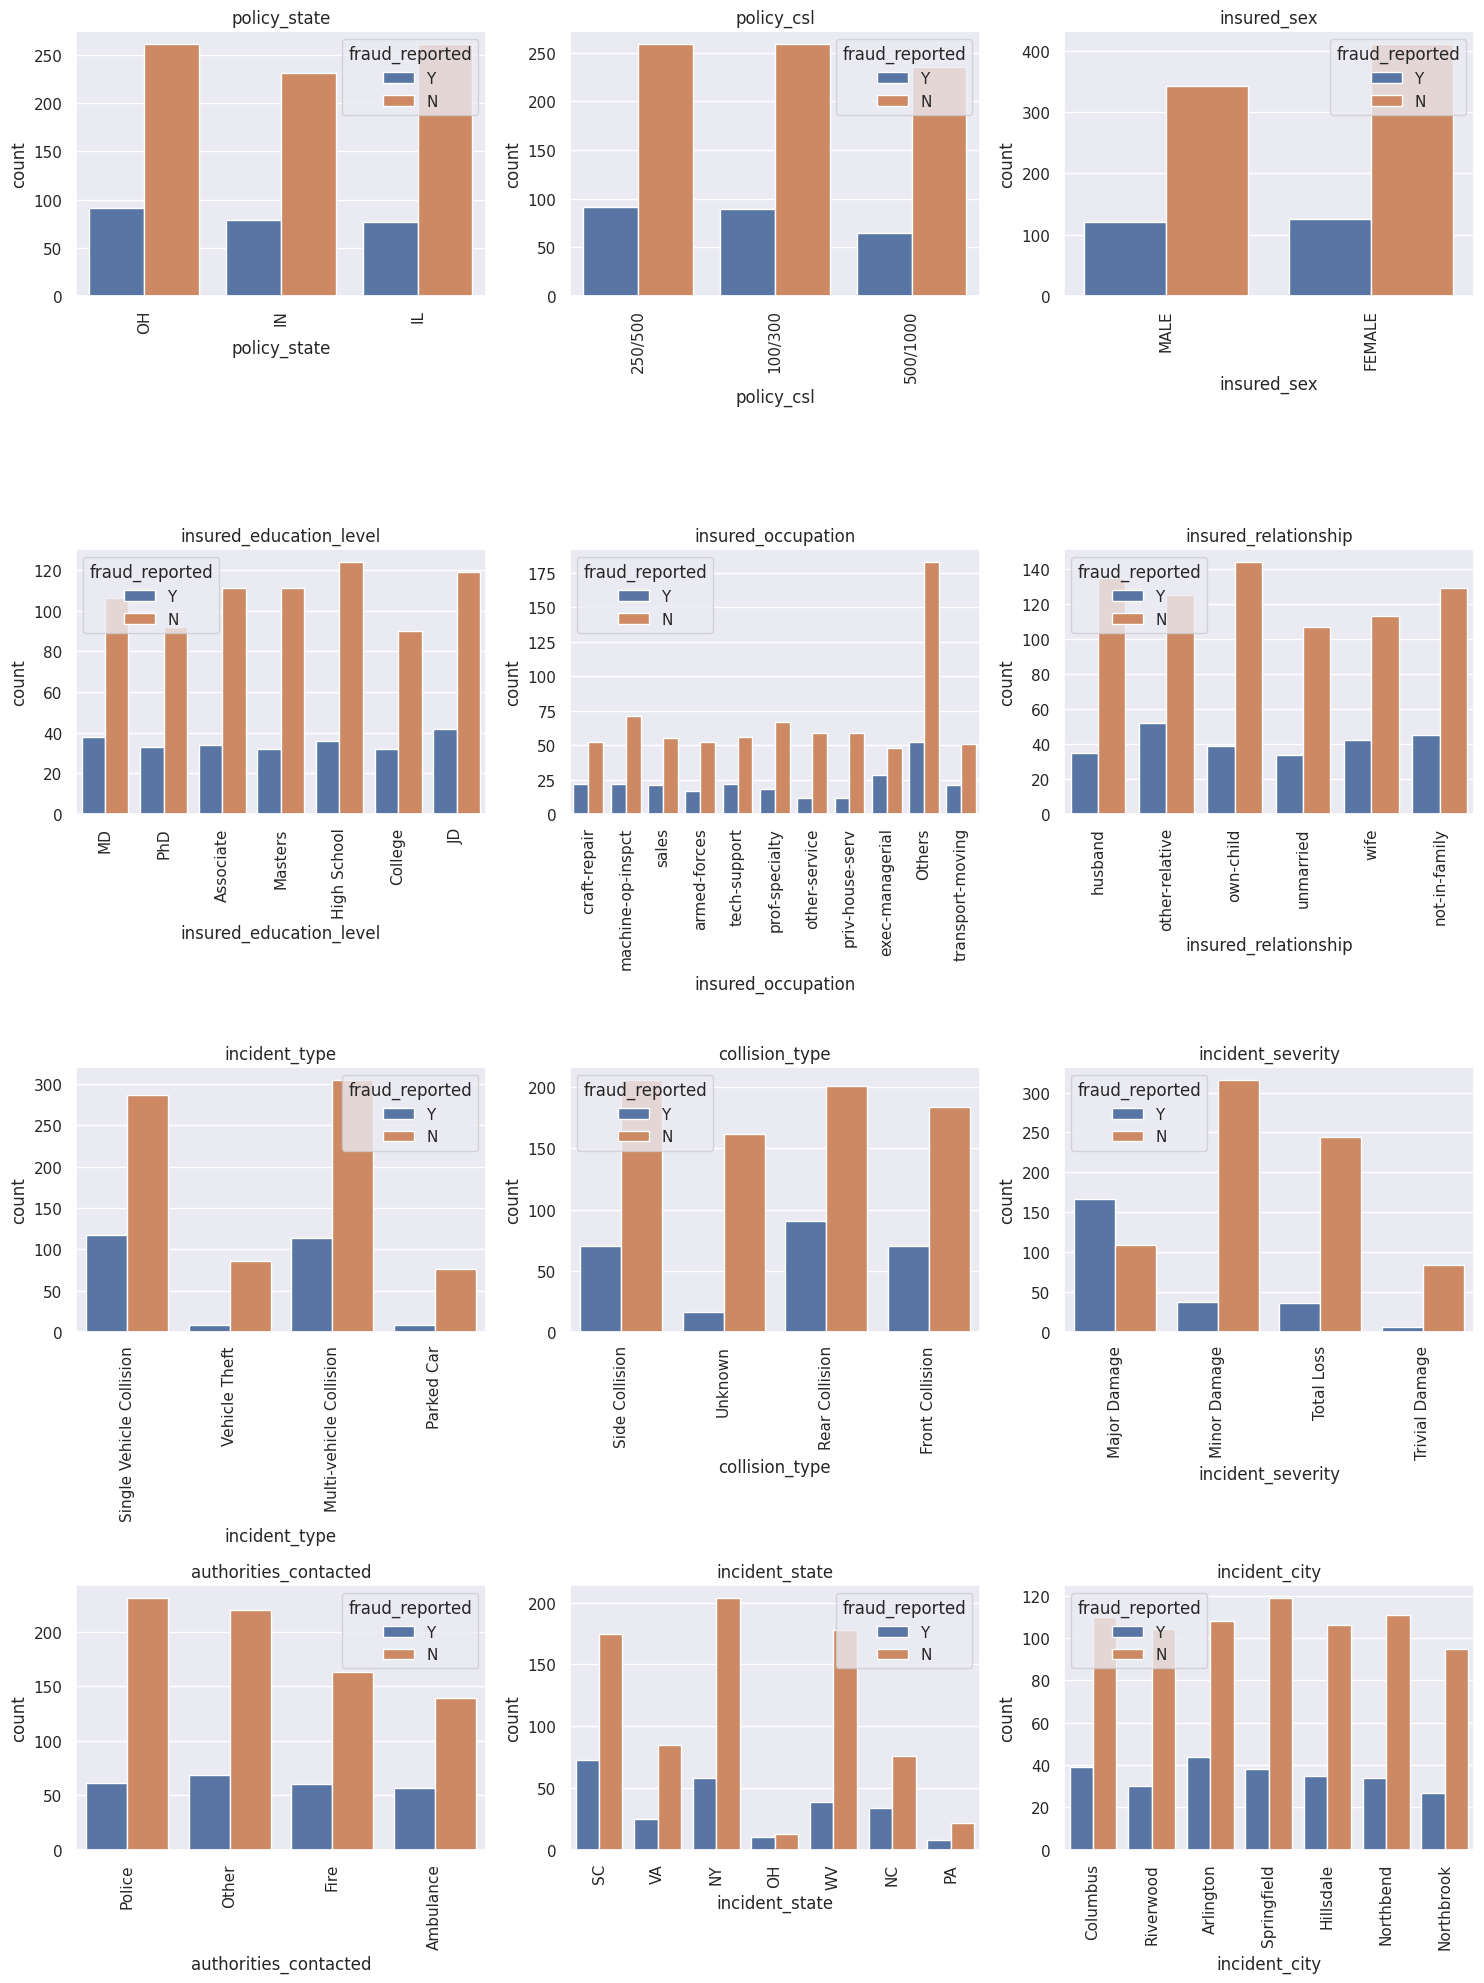

In [15]:
# Function to create countplot with 'Others' category for remaining values
def create_countplot_with_others(var, df, ax):
    top_values = df[var].value_counts().nlargest(10).index
    filtered_df = df.copy()
    filtered_df[var] = df[var].apply(lambda x: x if x in top_values else 'Others')
    sns.countplot(x=var, hue='fraud_reported', data=filtered_df, ax=ax)
    ax.set_title(var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'fraud_reported' from the list if it exists in cat_vars
if 'fraud_reported' in cat_vars:
    cat_vars.remove('fraud_reported')

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create count plots for each categorical variable
for i, var in enumerate(cat_vars):
    create_countplot_with_others(var, df, axs[i])

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
<ipython-input-16-39231622eb93>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_df[va

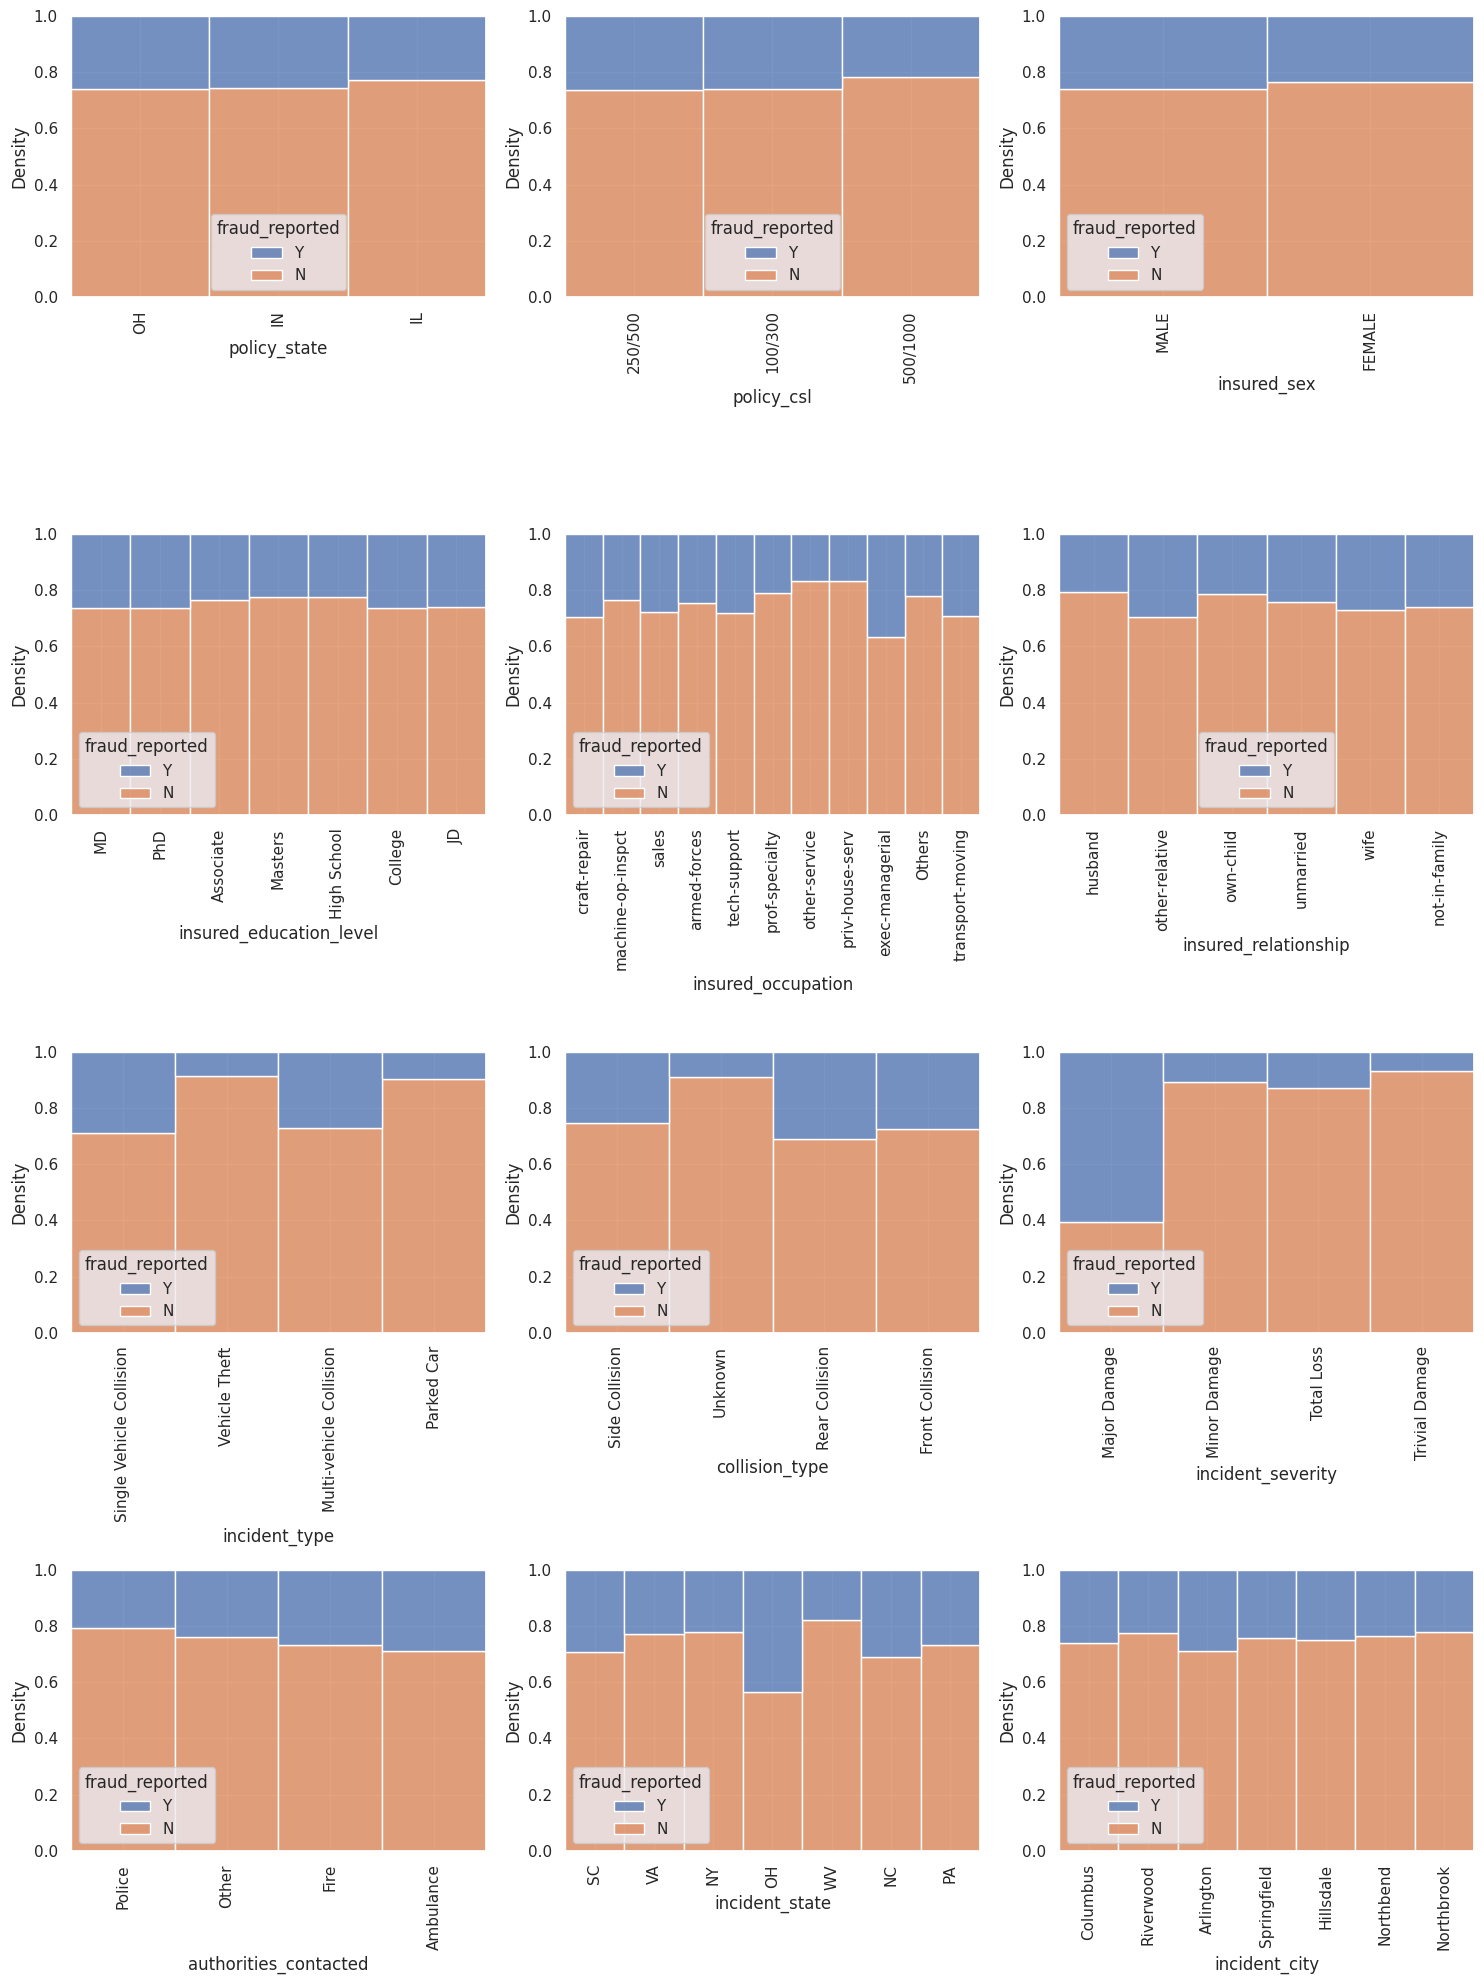

In [16]:
# Function to create count plot with 'Others' category for remaining values
def create_histplot_with_others(var, df, ax):
    top_values = df[var].value_counts().nlargest(10).index
    filtered_df = df.copy()
    filtered_df[var] = df[var].apply(lambda x: x if x in top_values else 'Others')
    sns.histplot(x=var, hue='fraud_reported', data=filtered_df, ax=ax, multiple="fill", kde=False, element="bars", fill=True, stat='density')
    ax.set_xticklabels(filtered_df[var].unique(), rotation=90)
    ax.set_xlabel(var)

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'fraud_reported' from the list if it exists in cat_vars
if 'fraud_reported' in cat_vars:
    cat_vars.remove('fraud_reported')

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create count plots for each categorical variable
for i, var in enumerate(cat_vars):
    create_histplot_with_others(var, df, axs[i])

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing Part 2

In [17]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the datatype of the column is 'object'
    if df[column].dtype == 'object':
        # Print the column name and its unique values
        print(f"Unique values for column '{column}':")
        print(df[column].unique())
        print()  # Add a newline for better readability

Unique values for column 'policy_state':
['OH' 'IN' 'IL']

Unique values for column 'policy_csl':
['250/500' '100/300' '500/1000']

Unique values for column 'insured_sex':
['MALE' 'FEMALE']

Unique values for column 'insured_education_level':
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

Unique values for column 'insured_occupation':
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

Unique values for column 'insured_relationship':
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

Unique values for column 'incident_type':
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

Unique values for column 'collision_type':
['Side Collision' 'Unknown' 'Rear Collision' 'Front Collision']

Unique values for column 'incident_severity':

# Do Manually label encoding for ordinal columns

In [18]:
# Manually encode ordinal columns
df['policy_csl'] = df['policy_csl'].replace({'250/500': 0, '100/300': 1, '500/1000': 2})

df['insured_education_level'] = df['insured_education_level'].replace({
    'High School': 0,
    'Associate': 1,
    'College': 2,
    'Masters': 3,
    'PhD': 4,
    'MD': 5,
    'JD': 6
})

df['incident_severity'] = df['incident_severity'].replace({
    'Trivial Damage': 0,
    'Minor Damage': 1,
    'Major Damage': 2,
    'Total Loss': 3
})

# Display the updated DataFrame
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,0,1000,MALE,5,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,2,Police,SC,Columbus,5,1,1,2,71610,6510,13020,52080,Y
1,228,42,IN,0,2000,MALE,5,machine-op-inspct,other-relative,0,0,Vehicle Theft,Unknown,1,Police,VA,Riverwood,8,1,0,0,5070,780,780,3510,Y
2,134,29,OH,1,2000,FEMALE,4,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,1,Police,NY,Columbus,7,3,2,3,34650,7700,3850,23100,N
3,256,41,IL,0,2000,FEMALE,4,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,2,Police,OH,Arlington,5,1,1,2,63400,6340,6340,50720,Y
4,228,44,IL,2,1000,MALE,1,sales,unmarried,66000,-46000,Vehicle Theft,Unknown,1,Other,NY,Arlington,20,1,0,1,6500,1300,650,4550,N


In [19]:
# Convert columns to integer datatype
df['policy_csl'] = df['policy_csl'].astype(int)
df['insured_education_level'] = df['insured_education_level'].astype(int)
df['incident_severity'] = df['incident_severity'].astype(int)

# Do Auto label encoding for the rest object datatype column

In [20]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

policy_state: [2 1 0]
insured_sex: [1 0]
insured_occupation: [ 2  6 11  1 12  9  7  8  3 10 13  5  0  4]
insured_relationship: [0 2 3 4 5 1]
incident_type: [2 3 0 1]
collision_type: [2 3 1 0]
authorities_contacted: [3 2 1 0]
incident_state: [4 5 1 2 6 0 3]
incident_city: [1 5 0 6 2 3 4]
fraud_reported: [1 0]


# Check the correlation between each columns

<Axes: >

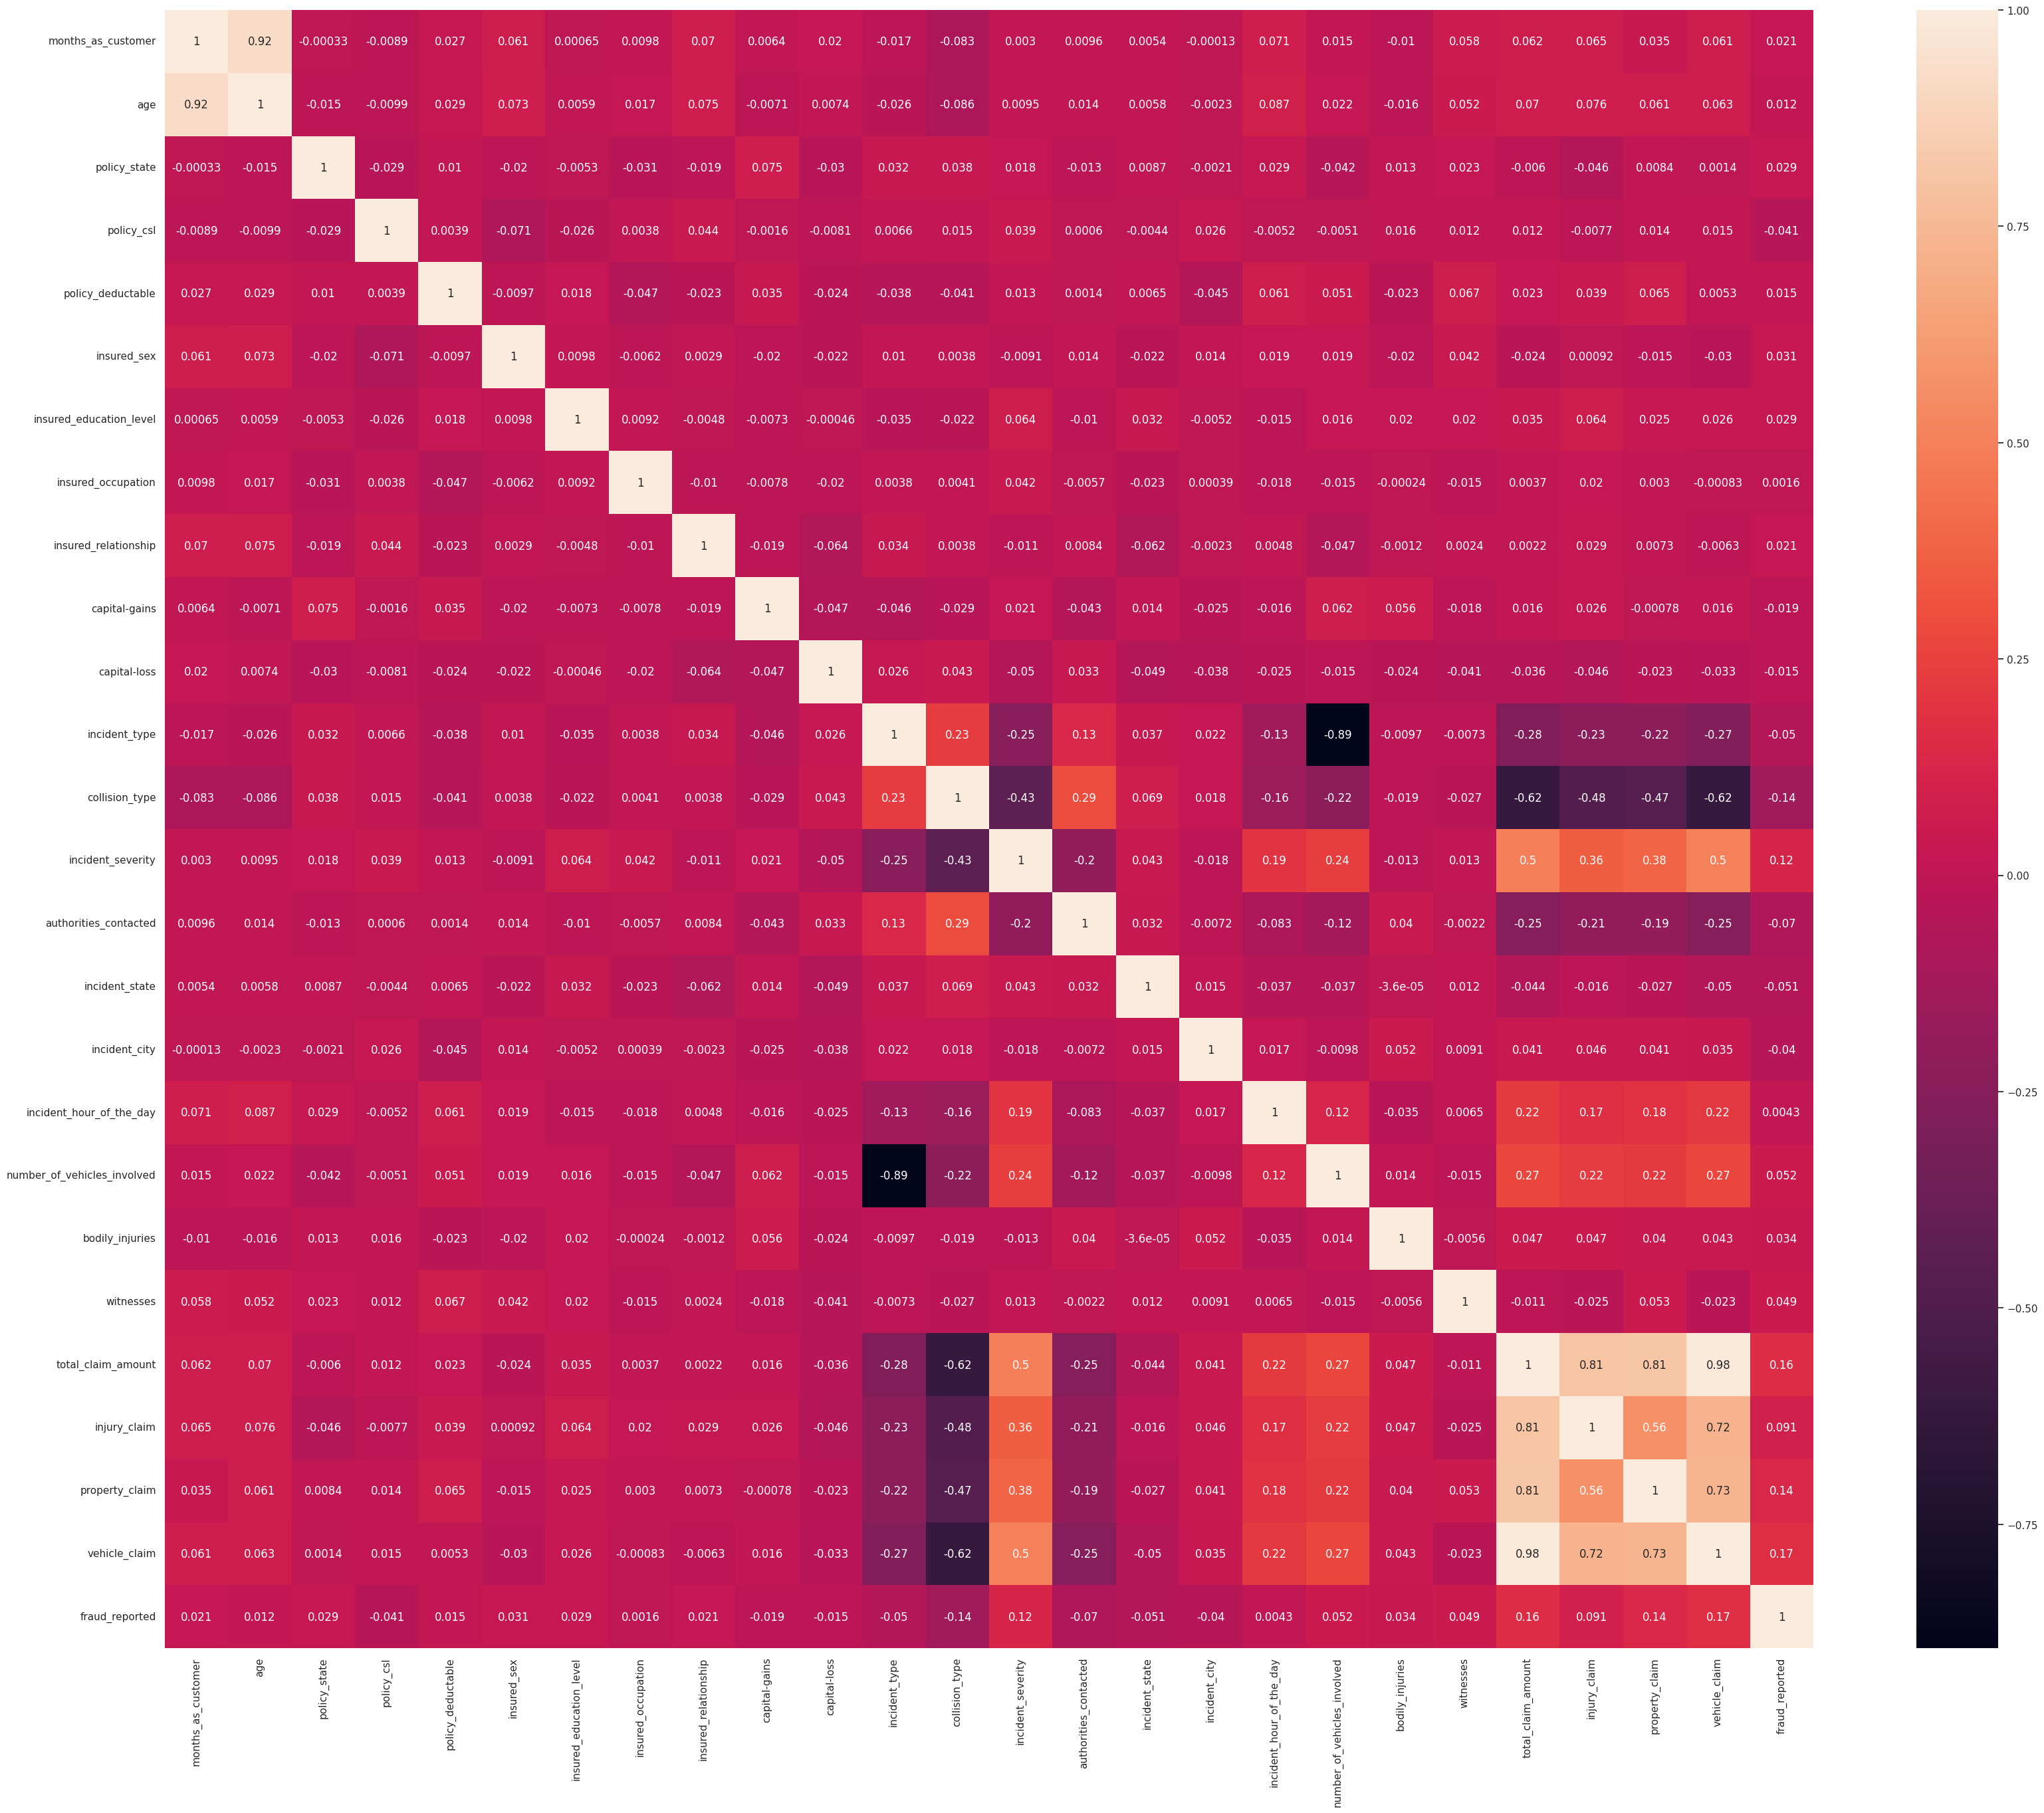

In [21]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Drop column that have high correlation toreduce redudancy

In [22]:
df.drop(columns = ['months_as_customer', 'injury_claim',
                   'property_claim', 'vehicle_claim'], inplace=True)
df.head()

,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,fraud_reported
0,48,2,0,1000,1,5,2,0,53300,0,2,2,2,3,4,1,5,1,1,2,71610,1
1,42,1,0,2000,1,5,6,2,0,0,3,3,1,3,5,5,8,1,0,0,5070,1
2,29,2,1,2000,0,4,11,3,35100,0,0,1,1,3,1,1,7,3,2,3,34650,0
3,41,0,0,2000,0,4,1,4,48900,-62400,2,0,2,3,2,0,5,1,1,2,63400,1
4,44,0,2,1000,1,1,11,4,66000,-46000,3,3,1,2,1,0,20,1,0,1,6500,0


# Apply MinMax Scaler for dataframe

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Replace the original DataFrame with the scaled DataFrame
df = scaled_df

# Display the scaled DataFrame
df.head()

,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,fraud_reported
0,0.644444,1.0,0.0,0.333333,1.0,0.833333,0.153846,0.0,0.530348,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.166667,0.217391,0.000000,0.5,0.666667,0.622801,1.0
1,0.511111,0.5,0.0,1.000000,1.0,0.833333,0.461538,0.4,0.000000,1.000000,1.000000,1.000000,0.333333,1.000000,0.833333,0.833333,0.347826,0.000000,0.0,0.000000,0.043285,1.0
2,0.222222,1.0,0.5,1.000000,0.0,0.666667,0.846154,0.6,0.349254,1.000000,0.000000,0.333333,0.333333,1.000000,0.166667,0.166667,0.304348,0.666667,1.0,1.000000,0.300906,0.0
3,0.488889,0.0,0.0,1.000000,0.0,0.666667,0.076923,0.8,0.486567,0.438344,0.666667,0.000000,0.666667,1.000000,0.333333,0.000000,0.217391,0.000000,0.5,0.666667,0.551298,1.0
4,0.555556,0.0,1.0,0.333333,1.0,0.166667,0.846154,0.8,0.656716,0.585959,1.000000,1.000000,0.333333,0.666667,0.166667,0.000000,0.869565,0.000000,0.0,0.333333,0.055739,0.0


# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud_reported'])  # Features
y = df['fraud_reported']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply GAN for Machine Learning modelling

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Define data dimensions (replace with your actual values)
num_features = X_train.shape[1]

# Define the Generator Network
def generator_model(latent_dim):
  model = tf.keras.Sequential([
      layers.Dense(128, activation="relu", input_shape=(latent_dim,)),
      layers.Dense(64, activation="relu"),
      layers.Dense(num_features, activation="sigmoid"),
  ])
  return model

# Define the Discriminator Network
def discriminator_model():
  model = tf.keras.Sequential([
      layers.Dense(64, activation="relu", input_shape=(num_features,)),
      layers.Dense(32, activation="relu"),
      layers.Dense(1, activation="sigmoid"),
  ])
  return model

# Create the GAN Model (combine generator and discriminator)
def gan_model(generator, discriminator):
  discriminator.compile(loss="binary_crossentropy", optimizer="adam")
  discriminator.trainable = False

  gan_input = layers.Input(shape=(100,))  # Latent noise input
  generated_data = generator(gan_input)
  discriminator_output = discriminator(generated_data)

  gan_model = tf.keras.Model(inputs=gan_input, outputs=discriminator_output)

  # Ensure the model is compiled (important)
  gan_model.compile(loss="binary_crossentropy", optimizer="adam")
  return gan_model

# Train the GAN Model
latent_dim = 100  # Size of noise vector for generator
batch_size = 32  # Adjust batch size as needed
epochs = 10

# Create discriminator and generator models
discriminator = discriminator_model()
generator = generator_model(latent_dim)

# Create GAN model
gan = gan_model(generator, discriminator)

# Create a tf.data.Dataset for shuffling and batching (recommended)
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=len(X_train))  # Shuffle the entire dataset
dataset = dataset.batch(batch_size)  # Create batches of size batch_size

for epoch in range(epochs):
  # Train the Discriminator and Generator
  for (x_batch, y_batch) in dataset:
    real_data_loss = discriminator.train_on_batch(x_batch, y_batch)
    noise = tf.random.normal(shape=(batch_size, latent_dim))
    generated_data = generator(noise)
    fake_data_loss = discriminator.train_on_batch(generated_data, tf.zeros((batch_size, 1)))
    discriminator_loss = (real_data_loss + fake_data_loss) / 2

    # Train Generator to fool the discriminator
    noise = tf.random.normal(shape=(batch_size, latent_dim))
    generator_loss = gan.train_on_batch(noise, tf.ones((batch_size, 1)))

  # Print training progress
  print(f"Epoch {epoch+1}, Discriminator loss: {discriminator_loss}, Generator loss: {generator_loss}")

# Generate synthetic data for further analysis (optional)
noise = tf.random.normal(shape=(100, latent_dim))
synthetic_data = generator.predict(noise)


Epoch 1, Discriminator loss: 0.4919061213731766, Generator loss: 1.0911920070648193
Epoch 2, Discriminator loss: 0.35738854110240936, Generator loss: 1.6877467632293701
Epoch 3, Discriminator loss: 0.7593332827091217, Generator loss: 1.0381860733032227
Epoch 4, Discriminator loss: 0.504815399646759, Generator loss: 1.6747963428497314
Epoch 5, Discriminator loss: 0.5837710872292519, Generator loss: 2.4377591609954834
Epoch 6, Discriminator loss: 0.43981860019266605, Generator loss: 2.8922557830810547
Epoch 7, Discriminator loss: 0.4896729402244091, Generator loss: 2.504636764526367
Epoch 8, Discriminator loss: 0.3853844702243805, Generator loss: 2.181079387664795
Epoch 9, Discriminator loss: 0.30892351269721985, Generator loss: 1.991807460784912
Epoch 10, Discriminator loss: 0.4685007929801941, Generator loss: 1.9783029556274414
4/4 [==============================] - 0s 3ms/step
